In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_users = pd.read_csv("user_mission.csv")
df_agg = pd.read_csv("agg_info.csv")


In [3]:
df_users['START_TIMESTAMP'] = pd.to_datetime(df_users['START_TIMESTAMP']).dt.date
df_users['END_TIMESTAMP'] = pd.to_datetime(df_users['END_TIMESTAMP']).dt.date
df_agg['PST_DATE'] = pd.to_datetime(df_agg['PST_DATE']).dt.date

In [4]:
df_users

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08,2018-10-16,True,1411458
1,2018-10-16,NaT,False,1411458
2,2018-10-19,2018-10-27,True,1424093
3,2018-10-27,2018-11-02,True,1424093
4,2018-11-10,NaT,False,1424093
...,...,...,...,...
27978,2018-12-13,2019-10-11,True,1368340
27979,2018-11-23,2018-12-13,True,1368340
27980,2018-12-12,NaT,False,1454145
27981,2018-11-08,2018-11-20,True,1454145


In [5]:
df_agg

,USER_ID,PST_DATE,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
0,423344,2018-11-03,0.0,0,61.600000,40,0.0,0.0
1,427412,2018-10-24,0.0,0,21.900000,25,0.0,0.0
2,427412,2018-10-25,0.0,0,39.250000,26,0.0,0.0
3,652251,2018-12-14,0.0,0,124.333336,56,0.0,3.0
4,658572,2018-11-18,0.0,0,222.516660,49,0.0,0.0
...,...,...,...,...,...,...,...,...
468035,1212312,2018-12-30,0.0,0,26.733334,8,0.0,4.0
468036,1212312,2018-12-31,0.0,0,26.683332,4,0.0,4.0
468037,1213718,2018-11-27,4.0,3,57.633335,24,0.0,3.0
468038,1238045,2018-10-21,0.0,0,62.683334,16,0.0,0.0


In [6]:
# Get all users who's mission are not completed
users_incomplete = df_users[df_users['COMPLETED'] == False]
users_incomplete 

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
1,2018-10-16,NaT,False,1411458
4,2018-11-10,NaT,False,1424093
8,2018-12-01,NaT,False,1418958
12,2018-11-02,NaT,False,1445159
13,2018-11-08,NaT,False,1449004
...,...,...,...,...
27937,2018-11-18,NaT,False,1463782
27955,2018-12-24,NaT,False,1208291
27963,2018-11-13,NaT,False,1408642
27972,2018-11-15,NaT,False,1458694


In [7]:
users_incomplete.drop_duplicates(subset = users_incomplete.columns, keep = False, inplace = True)
users_incomplete

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
1,2018-10-16,NaT,False,1411458
4,2018-11-10,NaT,False,1424093
8,2018-12-01,NaT,False,1418958
12,2018-11-02,NaT,False,1445159
13,2018-11-08,NaT,False,1449004
...,...,...,...,...
27937,2018-11-18,NaT,False,1463782
27955,2018-12-24,NaT,False,1208291
27963,2018-11-13,NaT,False,1408642
27972,2018-11-15,NaT,False,1458694


In [8]:
agg_records_incomplete = pd.DataFrame()
for x in range(0,len(users_incomplete)):
    user_id = users_incomplete.iloc[x]['USER_ID']
    record_date = users_incomplete.iloc[x]['START_TIMESTAMP']
    record_date += timedelta(days=1)
    temp_agg_records = df_agg[(df_agg['USER_ID']==user_id) & (df_agg['PST_DATE']==record_date)]
    agg_records_incomplete = pd.concat([agg_records_incomplete,temp_agg_records],axis=0)

In [9]:
agg_records_incomplete

,USER_ID,PST_DATE,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
406469,1411458,2018-10-17,1.0,1,41.200000,24,0.0,1.0
237566,1424093,2018-11-11,2.0,0,0.000000,0,1.0,3.0
433057,1418958,2018-12-02,0.0,0,158.283340,62,0.0,3.0
37081,1445159,2018-11-03,2.0,0,4.333334,6,0.0,0.0
213525,1449004,2018-11-09,0.0,0,101.250000,40,0.0,3.0
...,...,...,...,...,...,...,...,...
207919,1463782,2018-11-19,1.0,0,229.416670,42,0.0,3.0
132557,1208291,2018-12-25,0.0,0,30.933332,9,0.0,3.0
47915,1408642,2018-11-14,0.0,0,188.650000,29,0.0,3.0
65972,1458694,2018-11-16,1.0,0,190.933330,47,0.0,3.0


In [10]:
# Get all users who's mission are not completed
users_complete = df_users[df_users['COMPLETED'] == True]
users_complete

,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08,2018-10-16,True,1411458
2,2018-10-19,2018-10-27,True,1424093
3,2018-10-27,2018-11-02,True,1424093
5,2018-11-02,2018-11-10,True,1424093
6,2018-10-12,2018-10-19,True,1424093
...,...,...,...,...
27977,2018-11-11,2018-11-23,True,1368340
27978,2018-12-13,2019-10-11,True,1368340
27979,2018-11-23,2018-12-13,True,1368340
27981,2018-11-08,2018-11-20,True,1454145


In [11]:
users_complete.drop_duplicates(subset = users_complete.columns, keep = False, inplace = True)
users_complete

C:\Users\S.M.Ammar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,START_TIMESTAMP,END_TIMESTAMP,COMPLETED,USER_ID
0,2018-10-08,2018-10-16,True,1411458
2,2018-10-19,2018-10-27,True,1424093
3,2018-10-27,2018-11-02,True,1424093
5,2018-11-02,2018-11-10,True,1424093
6,2018-10-12,2018-10-19,True,1424093
...,...,...,...,...
27977,2018-11-11,2018-11-23,True,1368340
27978,2018-12-13,2019-10-11,True,1368340
27979,2018-11-23,2018-12-13,True,1368340
27981,2018-11-08,2018-11-20,True,1454145


In [12]:
agg_records_complete = pd.DataFrame()
for x in range(0,len(users_complete)):
    user_id = users_complete.iloc[x]['USER_ID']
    record_date = users_complete.iloc[x]['START_TIMESTAMP']
    temp_agg_records = df_agg[(df_agg['USER_ID']==user_id) & (df_agg['PST_DATE']==record_date)]
    agg_records_complete = pd.concat([agg_records_complete,temp_agg_records],axis=0)

In [13]:
agg_records_complete

,USER_ID,PST_DATE,NUM_CONVOS,NUM_ALL_MEALS,TOTAL_ACTIVITY_MINUTES2,NUM_ACTIVITY_MEASUREMENTS,NUM_WEIGHTS,NUM_NOTIFS
381672,1411458,2018-10-08,1.0,1,10.016666,43,0.0,3.0
83595,1424093,2018-10-19,2.0,2,30.250000,22,0.0,2.0
57095,1424093,2018-10-27,3.0,3,22.966667,26,1.0,0.0
103019,1424093,2018-11-02,3.0,0,62.083332,28,0.0,3.0
114526,1424093,2018-10-12,3.0,3,36.766666,32,0.0,1.0
...,...,...,...,...,...,...,...,...
47802,1368340,2018-11-11,3.0,2,162.916670,22,1.0,3.0
91276,1368340,2018-12-13,2.0,0,70.766670,22,0.0,3.0
78498,1368340,2018-11-23,2.0,2,64.916664,11,0.0,3.0
298575,1454145,2018-11-08,1.0,0,138.416670,53,0.0,2.0


In [14]:
# Stats for users with incomplete missions
avg_num_convos_icm = agg_records_incomplete['NUM_CONVOS'].mean()
avg_num_all_meals_icm = agg_records_incomplete['NUM_ALL_MEALS'].mean()
avg_total_minutes_icm = agg_records_incomplete['TOTAL_ACTIVITY_MINUTES2'].mean()
avg_activity_measurements_icm = agg_records_incomplete['NUM_ACTIVITY_MEASUREMENTS'].mean()
avg_weights_icm = agg_records_incomplete['NUM_WEIGHTS'].mean()
avg_notifications_icm = agg_records_incomplete['NUM_WEIGHTS'].mean()

In [15]:
# Stats for users with complete missions
avg_num_convos_cm = agg_records_complete['NUM_CONVOS'].mean()
avg_num_all_meals_cm = agg_records_complete['NUM_ALL_MEALS'].mean()
avg_total_minutes_cm = agg_records_complete['TOTAL_ACTIVITY_MINUTES2'].mean()
avg_activity_measurements_cm = agg_records_complete['NUM_ACTIVITY_MEASUREMENTS'].mean()
avg_weights_cm = agg_records_complete['NUM_WEIGHTS'].mean()
avg_notifications_cm = agg_records_complete['NUM_WEIGHTS'].mean()

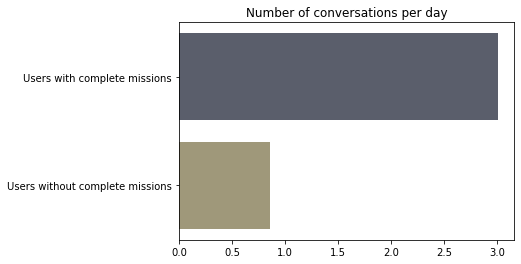

In [16]:
plt.title("Number of conversations per day")
sns.barplot(x=[avg_num_convos_cm,avg_num_all_meals_icm],y=['Users with complete missions','Users without complete missions'],palette="cividis")

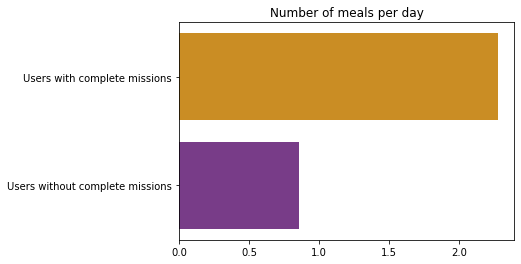

In [17]:
plt.title("Number of meals per day")
sns.barplot(x=[avg_num_all_meals_cm,avg_num_all_meals_icm],y=['Users with complete missions','Users without complete missions'],palette="CMRmap_r")

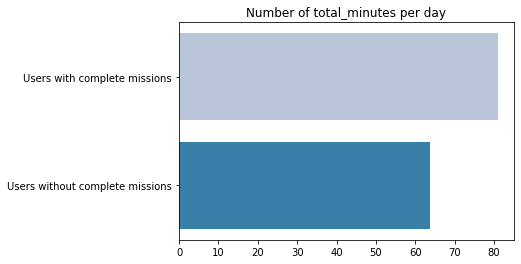

In [18]:
plt.title("Number of total_minutes per day")
sns.barplot(x=[avg_total_minutes_cm,avg_total_minutes_icm],y=['Users with complete missions','Users without complete missions'],palette="PuBu")

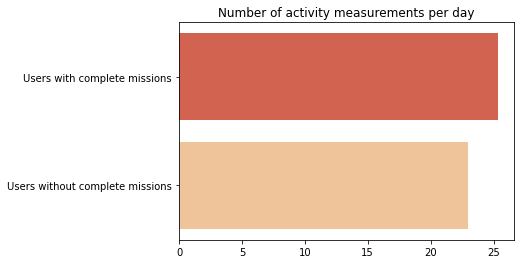

In [19]:
plt.title("Number of activity measurements per day")
sns.barplot(x=[avg_activity_measurements_cm,avg_activity_measurements_icm],y=['Users with complete missions','Users without complete missions'],palette="OrRd_r")

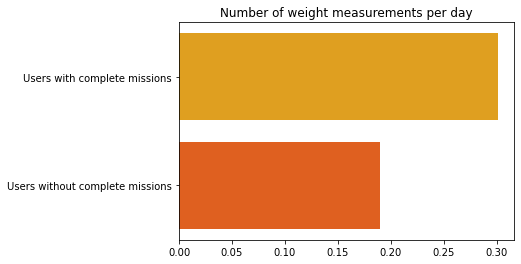

In [20]:
plt.title("Number of weight measurements per day")
sns.barplot(x=[avg_weights_cm,avg_weights_icm],y=['Users with complete missions','Users without complete missions'],palette="autumn_r")

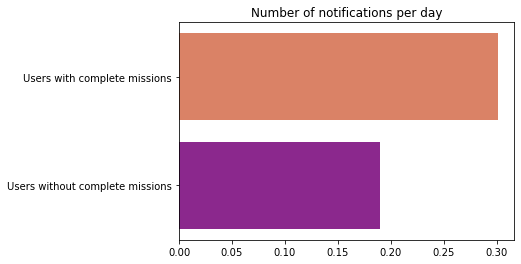

In [21]:
plt.title("Number of notifications per day")
sns.barplot(x=[avg_notifications_cm,avg_notifications_icm],y=['Users with complete missions','Users without complete missions'],palette="plasma_r")